## INCOME LEVEL PREDICTION

### Table of contents
- [Project Overview](#project_overview)
- [Dataset Description](#dataset_description)
- [Python Libraries Used](#python_libraries_used)
- [Process](#process)
- [Data Collection and Preparation](#data_Collection_and_preparation)
- [Exploratory Data Analysis](#exploratory_data_analysis)
- [Data Preprocessing and Feature Engineering](#data_preprocessing_and_feature_engineering)
- [Model Development](#model_development)
- [Model Evaluation](#model_evaluation)
- [Summary and Recommendations](#summary)
- [Reference](#section)

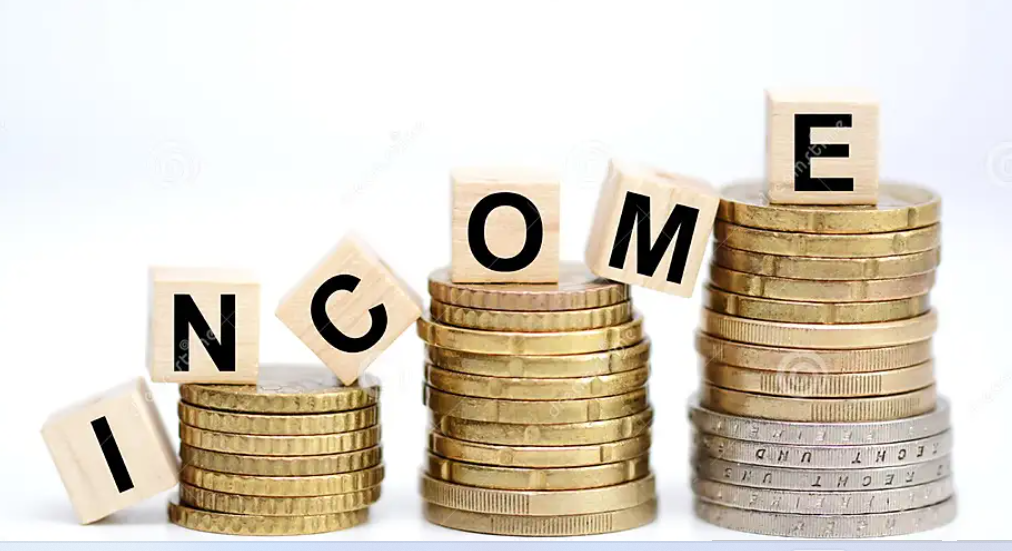

### PROJECT OVERVIEW  <a id="project_overview"><a/>
    
A person's level of income can be influenced by a number of factors and with this project we will explore some key features that may affect one's income level. The dataset used contains demographic information about individuals and aims to predict whether a person's income exceeds $50,000 per year. By leveraging various census data, we will explore the data, engineer relevant features, build and evaluate the predictive model, and provide insights from the data.

### OBJECTIVE
The primary objective of this project is to develop a machine learning model that predicts whether an individual's income exceeds $50,000 based on their demographic attributes.

### DATASET DESCRIPTION <a id="dataset_description"><a/>

The dataset used for this project is the "income_data.csv" file. It contains demographic information about individuals from different countries.The data consists of 48842 records and 15 columns including:

- `age`: Age of the individual
- `workclass`: Type of employment
- `fnlwgt`: Final weight, a measure of how representative an individual is of the population
- `education`: Level of education
- `education-num`: Number of years of education
- `marital-status`: Marital status of the individual
- `occupation`: Type of occupation
- `relationship`: Relationship status
- `race`: Race of the individual
- `sex`: Gender of the individual
- `capital-gain`: Capital gains
- `capital-loss`: Capital losses
- `hours-per-week`: Average hours worked per week
- `native-country`: Country of origin
- `income`: Income level (target variable: ">50K" or "<=50K")


### PYTHON LIBRARIES USED <a id="python_libraries_used"><a/>

- Pandas- for working with dataframes
- Numpy- for numerical computation
- Matplotlib- for visualization and visual formatting
- Seaborn- for visualization
- Sklearn- for building and evaluating our machine learning model
- Joblib- for saving our model


### PROCESS <a id="process"><a/>
The steps involved in this project are as follows:
- **1.** Data Collection and Preparation
- **2.** Exploratory Data Analysis (EDA)
- **3.** Data Preprocessing and Feature Engineering
- **4.** Model Development
- **5.** Model Evaluation
- **6.** Summary and Recommendations

## 1. Data Collection and Preparation <a id="data_Collection_and_preparation"><a/>

In the initial data preparation phase, we performed the following tasks:
1. Importing relevant libraries
2. Data loading and inspection
3. Handling missing data values and duplicates
4. Data cleaning and formatting

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# importing our libraries for preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importing our metrics
from sklearn .metrics import(accuracy_score,
                            roc_auc_score,
                             classification_report,
                             roc_curve,
                             auc,
                             confusion_matrix
)

# setting plt style
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading our data
income_level = pd.read_csv("income_data.csv")

In [3]:
# Checking our data to see the first few rows
income_level.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income_level.shape

(48842, 15)

In [5]:
income_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
# Checking for null values
income_level.isna().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [7]:
# Checking for duplicates
income_level.duplicated().sum()

48

In [8]:
# Handling the null values and duplicates by dropping them

income_level = income_level.dropna().drop_duplicates()

In [9]:
income_level.shape

(47573, 15)

In [10]:
# Dropping irrelevant features
income_level = income_level.drop(['fnlwgt', 'education-num', 'relationship'], axis = 1)

In [11]:
# Ensuring that the columns have the correct data type

income_level.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

The income column which is our target variable is supposed to be an integer not an object. So, we will make the necessary modification by converting the values to binary and mapping it to the values in the column.

In [12]:
# changing the data type of the income column from string to integer

# Replacing the values with binary numbers, <=50K = 0, >50K= 1
new_income = {
    '<=50K': 0,
    '>50K': 1
}
            
# mapping the new values to the column
income_level.income = income_level.income.map(new_income)

In [13]:
# checking to see if it worked
income_level.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

## 2. Exploratory Data Analysis  <a id="exploratory_data_analysis"><a/>

EDA involved exploring the income data to answer key questions, such as:
- What is the summary statistics from the data?
- Which income level has the highest occurence?
- What is the ditribution of various categories in the data?
- How do different features such as age, occupation, marital status, education etc,  affect income levels?

In [14]:
# Displaying summary statistics for numerical columns
income_level.describe()

,age,capital-gain,capital-loss,hours-per-week,income
count,47573.000000,47573.000000,47573.000000,47573.000000,47573.000000
mean,38.648771,1092.238581,87.942131,40.603998,0.242469
std,13.556990,7490.924415,404.204740,12.261040,0.428581
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

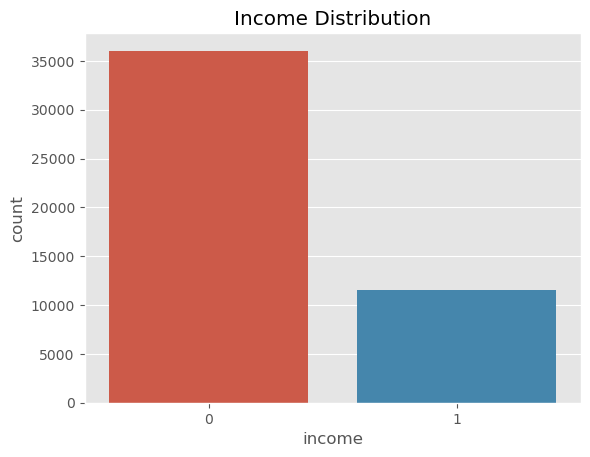

In [15]:
# visualizing income distribution

sns.countplot(x='income', data = income_level)
plt.title('Income Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

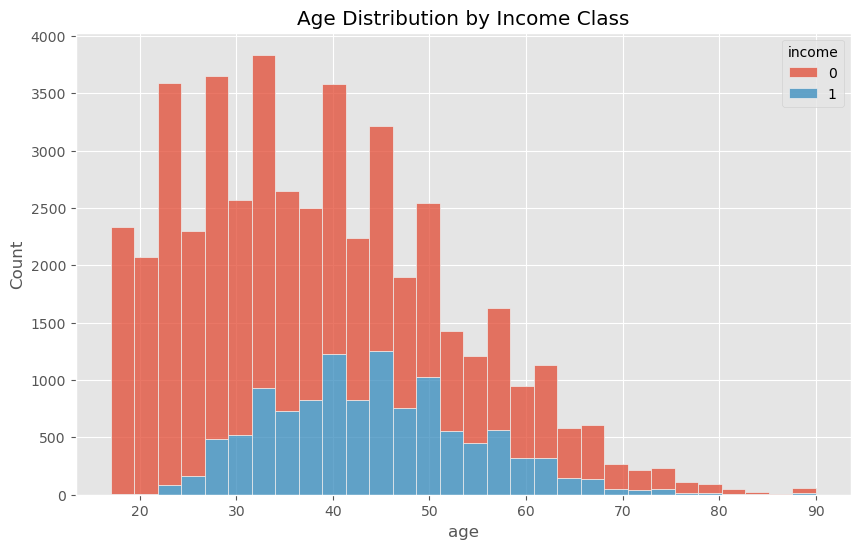

In [16]:
# Age distribution by Income Class

plt.figure(figsize=(10,6))
sns.histplot(data= income_level, x = 'age', hue = 'income', multiple = "stack", bins= 30)
plt.title('Age Distribution by Income Class')
plt.show

In [17]:
# Performing Univariate Analysis on numerical columns

# # checking for outliers using Box plot
# sns.boxplot(x='hours-per-week', data=income_level)
# plt.title('hours-per-week')
# plt.show()

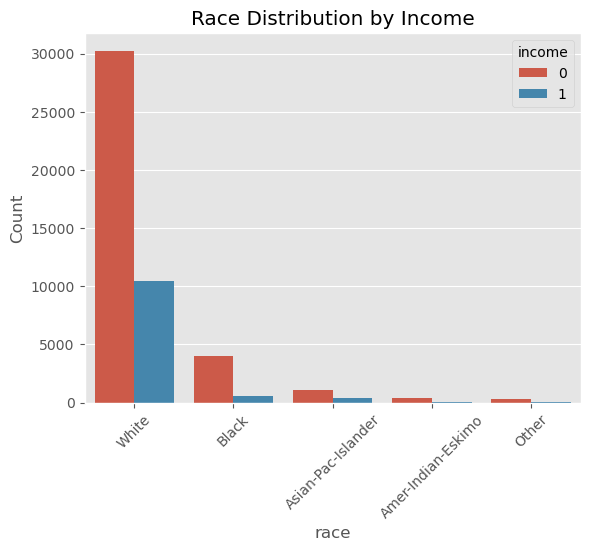

In [18]:
# Analysing the Race Distribution by income

sns.countplot(x='race', data=income_level, hue = 'income')
plt.title('Race Distribution by Income')
plt.xlabel('race')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

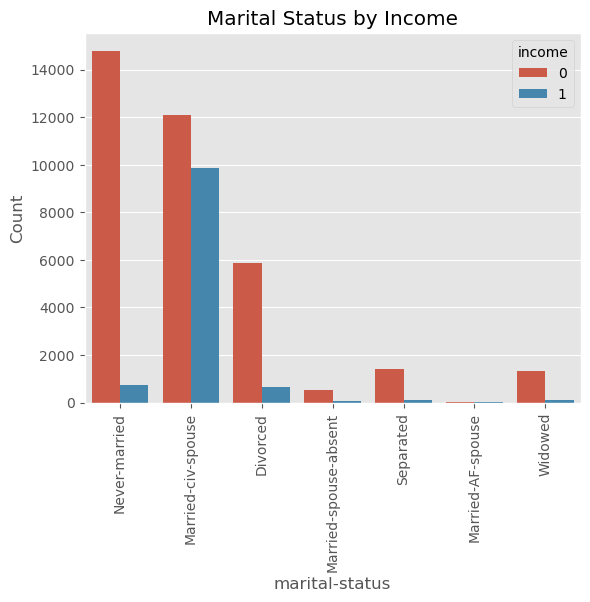

In [19]:
## Identify the distribution of marital status

sns.countplot(x='marital-status', data=income_level, hue = 'income')
plt.title('Marital Status by Income')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

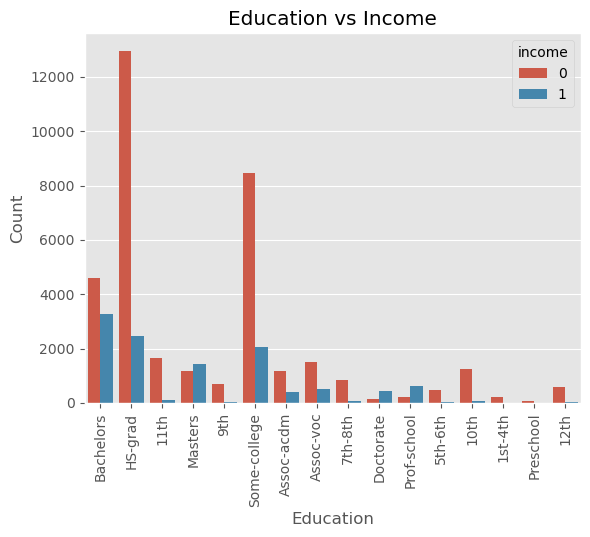

In [20]:
# Identify the income distribution based on education

sns.countplot(x='education', data=income_level, hue = 'income')
plt.title('Education vs Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

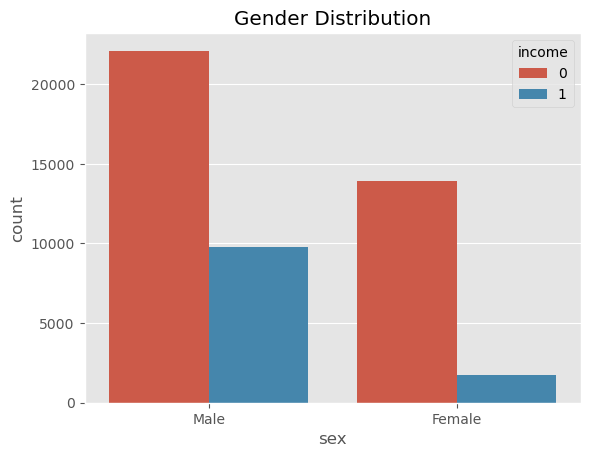

In [21]:
# Gender vs Income
sns.countplot(x='sex', hue= 'income', data = income_level)
plt.title('Gender Distribution')
plt.show


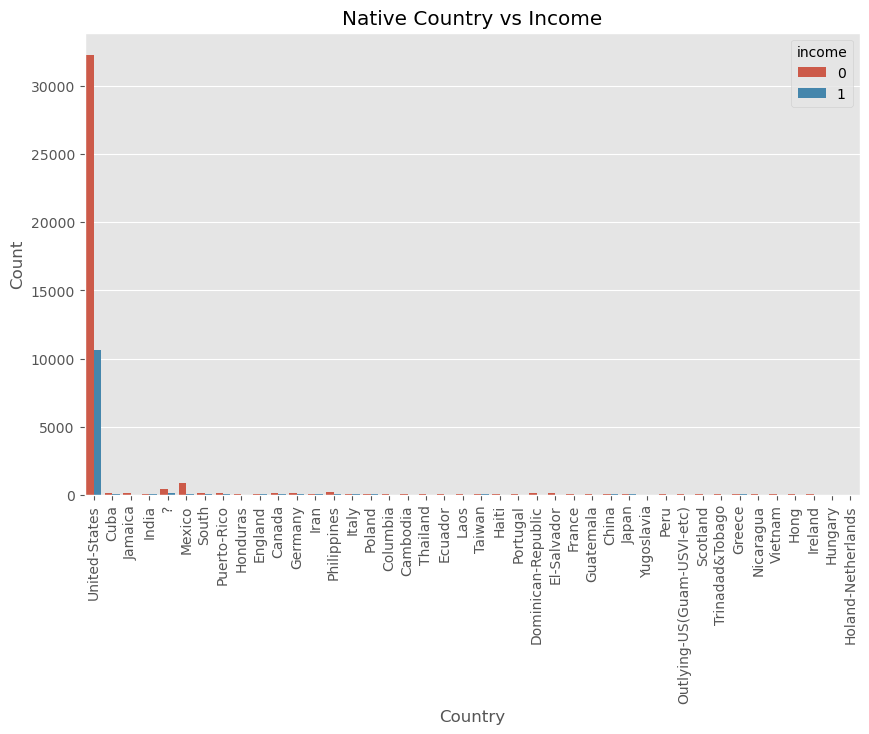

In [22]:
# # Identify the income distribution of native countries

plt.figure(figsize=(10,6))
sns.countplot(x='native-country', data=income_level, hue ='income')
plt.title('Native Country vs Income')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

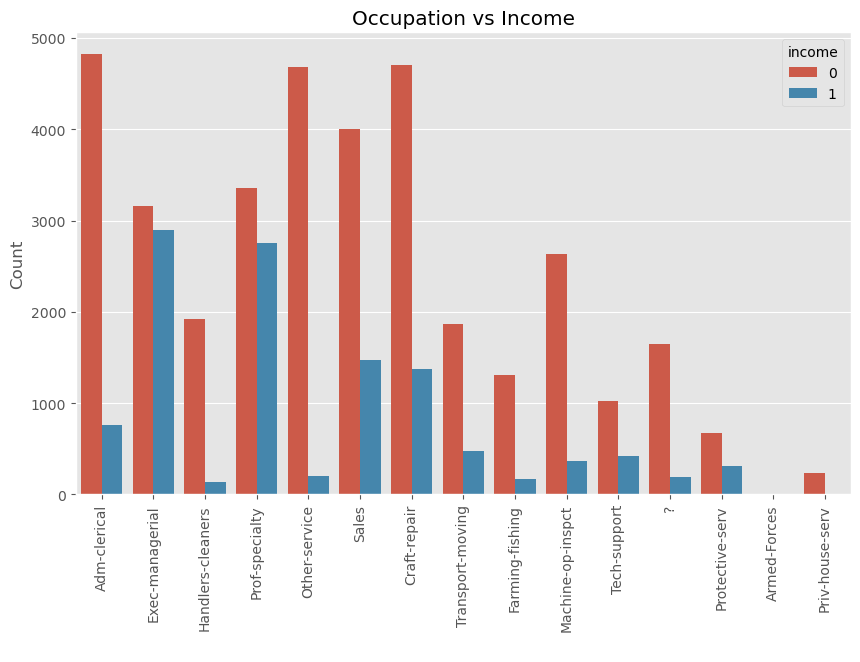

In [23]:
# Identify the income distribution by occupations

plt.figure(figsize=(10,6))
sns.countplot(x='occupation', data=income_level, hue= 'income')
plt.title('Occupation vs Income')
plt.xlabel(' ')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

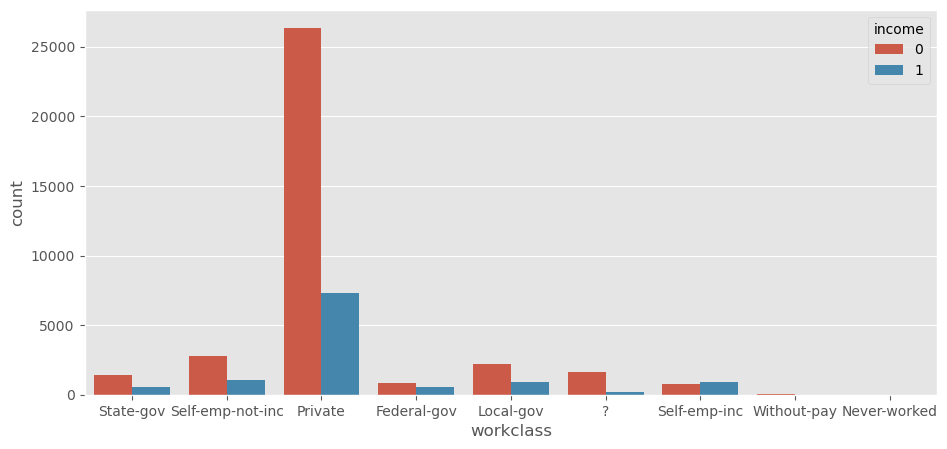

In [24]:
# Workclass vs Income
plt.figure(figsize=(11,5))
sns.countplot(x ='workclass', hue='income', data=income_level)
plt.show

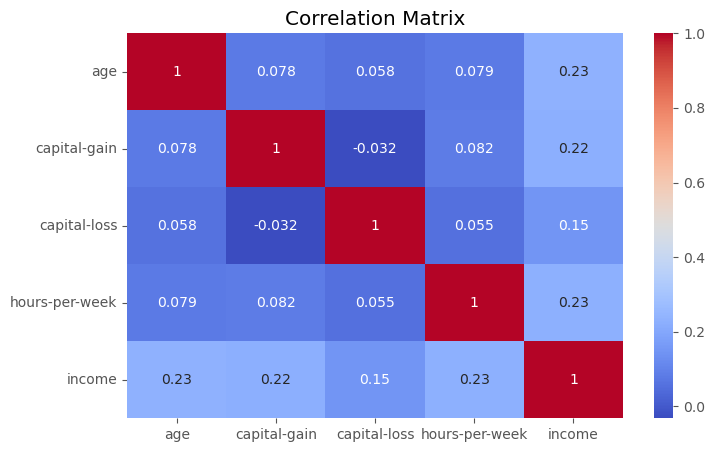

In [25]:
# Using a correlation matrix to understand relationship between the numerical variables
num_variable = income_level.select_dtypes(include = 'number')

# Representing this on a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(num_variable.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.0, 'Capital Loss')

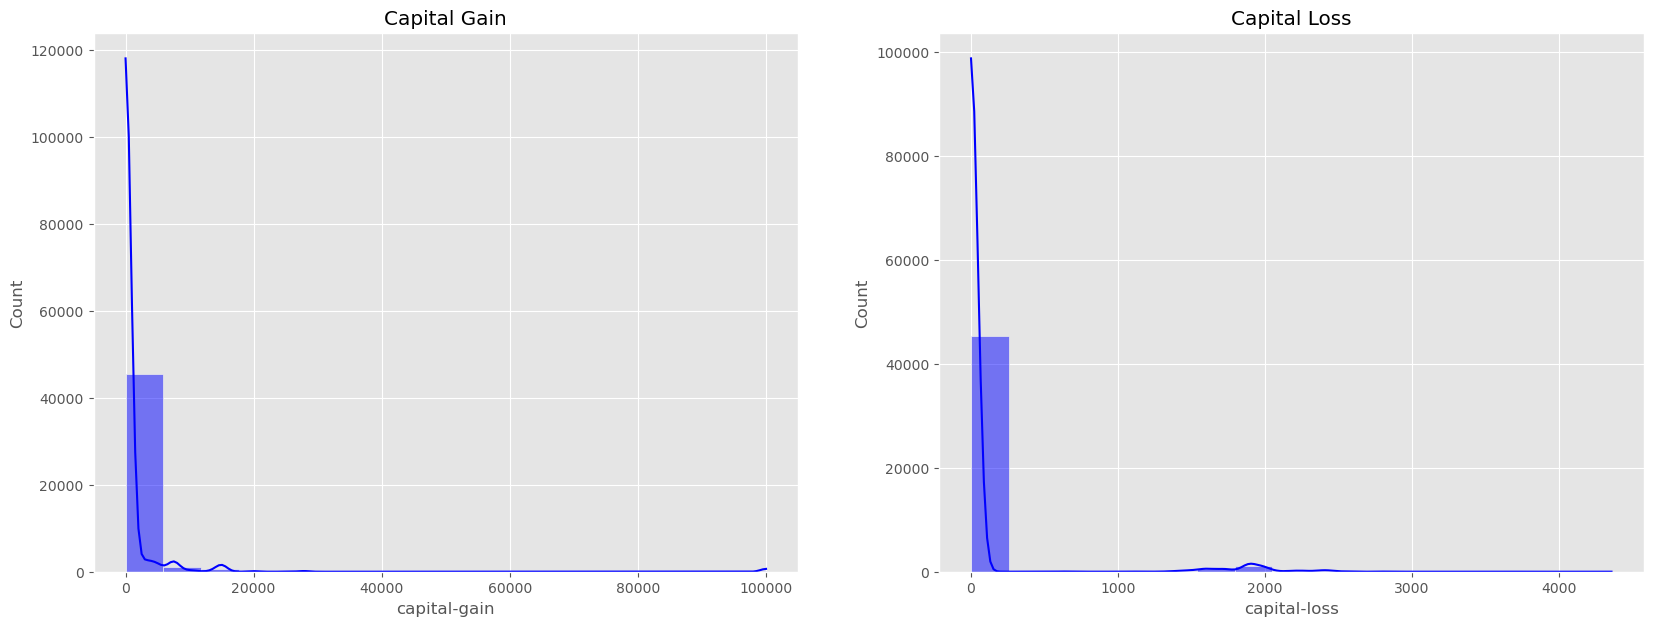

In [26]:
# Capital gain vs Capital loss
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.histplot(income_level['capital-gain'], kde= True, color= 'b')
plt.title('Capital Gain')
plt.subplot(1,2,2)
sns.histplot(income_level['capital-loss'], kde= True, color= 'b')
plt.title('Capital Loss')

### Insights
1. **Income Distribution:** The number of people who earn less than 50k/yr are far more than the number of people who earn more, based on the data.
2. **Age vs Income:** Although the age grade 30-40 had the highest representation in the data, those who earn more than 50k/yr were within `40-50 years`.
3. **Race vs Income:** The `whites` were more in number and had more people earning more than 50k/yr compared to other races. 
4. **Marital Status vs Income:** The `never married` group had the most persons in the <=50k/yr income level while the `married -civ-spouse` had the highest number of  persons earning above 50k/yr. This indicates that married couples tend to earn higher than other groups
5. **Education vs income:** `Prof school` had the highest number of people earning above 50k/yr, closely followed by doctorate and masters. Although, this had a smaller representation in the data but more people in these education levels earned more than 50k/yr. Other groups like HS-grad, pre-school etc had more people earning less than 50k/yr. This shows that Education impacts your level of income.
6. **Gender Distribution:** The `males` had more representation and earned more than the females.
7. **Native Country vs Income:** The `United States` had a greater representation from the rest countries. We also noticed an unknown group *('?')*
8. **Occupation vs Income:** `Exec-managerial` and `prof-specialty` had the highest number of people earning over 50k/yr. Admin-clerical and craft repair has the highest number earning less than 50k/yr. We also notice some missing values '?'
9. **Workclass vs Income:** Those in the `self-emp-inc` group  and `federal-govt` have more persons who earn more than 50k/yr, while we have most persons in the 'private' group earning less than 50k/yr. some missing values were also present.
10. **Correlation:** There is a `weak positive correlation` between income and age, income and capital gain and income and hours per week. A very weak negative correlation was observed between capital gain and capital loss.

## 3. Data Preprocessing and Feature Engineering  <a id="data_preprocessing_and_feature_engineering"><a/>   

This process involved:
- Handling unknown values using simple imputer
- Encoding categorical variables using one hot encoder
- Feature scaling: standardization
- Dimensionality Reduction using PCA
- Train Test Split

### Dealing with the unknown (?) using simple imputer

In [27]:
# Checking for the unknown values
income_level.isin(['?']).sum()

age                  0
workclass         1836
education            0
marital-status       0
occupation        1843
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [28]:
# Replacing '?' with nan
income_level.replace('?', np.nan, inplace = True)
data = income_level.drop('income', axis = 1)

In [29]:
# Using simple imputer to fill in the missing values
# Splitting the data into categorical and numerical variables
cat_variable = data.select_dtypes(exclude = 'number')
num_variable = data.select_dtypes(include= 'number')

# imputer for numerical data
num_imputer = SimpleImputer(strategy= 'median')
transformed_num = num_imputer.fit_transform(num_variable)

num = pd.DataFrame(transformed_num, columns=num_variable.columns) # Assigning it to a dataframe

# imputer for categorical data
cat_imputer = SimpleImputer(strategy= 'most_frequent')
transformed_cat = cat_imputer.fit_transform(cat_variable)

cat = pd.DataFrame(transformed_cat, columns=cat_variable.columns) # Assigning the transformed categories to a dataframe

In [30]:
# checking our data to see if it worked
print(num.isnull().sum())
print()
print(cat.isnull().sum())

age               0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

workclass         0
education         0
marital-status    0
occupation        0
race              0
sex               0
native-country    0
dtype: int64


 ### Encoding categorical variables using one hot encoder

In [31]:
# Initialising one hot encoder
one_hot = OneHotEncoder(sparse_output = False)

hot = one_hot.fit_transform(cat) # applying it to the categorical variables

feature_names = one_hot.get_feature_names_out()

cat_encoded = pd.DataFrame(hot, columns=feature_names)

cat_encoded

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47568,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47569,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47570,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


The categorical variables in the dataset have been successfully encoded, resulting in 93 columns.

### Feature Scaling: Standardization 

In [32]:
# Using standardization for the numerical columns
std_scaler = StandardScaler()

ss = std_scaler.fit_transform(num)

# Assigning the output to a dataframe
std_names = std_scaler.get_feature_names_out()

num_scaled = pd.DataFrame(ss, columns=std_names)

num_scaled

,age,capital-gain,capital-loss,hours-per-week
0,0.025908,0.144411,-0.217571,-0.049262
1,0.837306,-0.145810,-0.217571,-2.251382
2,-0.047856,-0.145810,-0.217571,-0.049262
3,1.058596,-0.145810,-0.217571,-0.049262
4,-0.785490,-0.145810,-0.217571,-0.049262
...,...,...,...,...
47568,-0.416673,-0.145810,-0.217571,-0.049262
47569,0.025908,-0.145810,-0.217571,-0.375502
47570,-0.047856,-0.145810,-0.217571,0.766338
47571,0.394725,0.582412,-0.217571,-0.049262


In [33]:
# Joining both dataframes together
X_concat= pd.concat([num_scaled, cat_encoded], axis = 1)

# checking our new dataframe
X_concat.head()


,age,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.025908,0.144411,-0.217571,-0.049262,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.837306,-0.145810,-0.217571,-2.251382,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.047856,-0.145810,-0.217571,-0.049262,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.058596,-0.145810,-0.217571,-0.049262,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.785490,-0.145810,-0.217571,-0.049262,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dimensionality Reduction using PCA

In [34]:
# initialize a pca object
pca = PCA(n_components = 30)
X_reduced = pca.fit_transform(X_concat)

print(X_concat.shape)
print(X_reduced.shape)

(47573, 97)
(47573, 30)


### Train Test Split

In [35]:
X = X_reduced
y = income_level['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Model Development  <a id="model_development"><a/>
    
### **Model Selection**
I used a number of select models in order to get one with the best performance, they include:
1. Random forest clasifier
2. Adaboost classifier
3. k-nearest neighbors
4. Logistic regression
5. XGBClassifier

### Random Forest Classifier

In [36]:
# Using the random forest classifier
forest1 = RandomForestClassifier()
forest1.fit(X_train, y_train)

# Predicting our test and train data
y_pred= forest1.predict(X_test)
y_train_pred= forest1.predict(X_train)

In [37]:
# Model evaluation
accuracy = accuracy_score(y_test,y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {Train_accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(f"classification report: {report}")

ROC_AUC = roc_auc_score(y_test, y_pred)
print(f"Test ROC_AUC Score: {ROC_AUC:.2f}")

print("confusion matrix:", confusion_matrix(y_test, y_pred))

Test accuracy: 0.84
Train accuracy: 0.97
classification report:               precision    recall  f1-score   support

           0       0.87      0.92      0.89      7106
           1       0.71      0.60      0.65      2409

    accuracy                           0.84      9515
   macro avg       0.79      0.76      0.77      9515
weighted avg       0.83      0.84      0.83      9515

Test ROC_AUC Score: 0.76
confusion matrix: [[6520  586]
 [ 965 1444]]


### Hyper-parameter tuning
RandomizedSearchCV was used to optimize model parameters for the best performance.

In [38]:
# defining my parameter grid

params_grid = {
    "n_estimators": [20, 50, 100, 150, 200],
    "criterion": ["gini", "entropy", "none"],
    "max_depth": range(1,10)
}

# using random search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=params_grid,
    n_iter=20
)

In [39]:
random_search.fit(X_train, y_train)

# Identifying the best parameters to use
random_search.best_params_

{'n_estimators': 150, 'max_depth': 9, 'criterion': 'gini'}

In [40]:
# Getting the best score
random_search.best_score_

0.8544590990458054

In [53]:
# applying it to the random classifier
forest = RandomForestClassifier(criterion='gini', n_estimators=150, max_depth = 9)
forest.fit(X_train, y_train)

# Predicting our test  and train data
y_predi= forest.predict(X_test)
y_train_predi= forest.predict(X_train)

In [54]:
# Model evaluation
accuracy = accuracy_score(y_test,y_predi)
print(f"Test accuracy: {accuracy:.2f}")

Train_accuracy = accuracy_score(y_train, y_train_predi)
print(f"Train accuracy: {Train_accuracy:.2f}")

report = classification_report(y_test, y_predi)
print(f"classification report: {report}")

ROC_AUC = roc_auc_score(y_test, y_predi)
print(f"Test ROC_AUC Score: {ROC_AUC:.2f}")

print("confusion matrix:", confusion_matrix(y_test, y_predi))

Test accuracy: 0.85
Train accuracy: 0.87
classification report:               precision    recall  f1-score   support

           0       0.86      0.95      0.90      7106
           1       0.79      0.55      0.65      2409

    accuracy                           0.85      9515
   macro avg       0.82      0.75      0.77      9515
weighted avg       0.84      0.85      0.84      9515

Test ROC_AUC Score: 0.75
confusion matrix: [[6751  355]
 [1091 1318]]


### Adaboost Classifier

In [43]:
# using adaboost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# Predicting our test  and train data
y_predi= ada.predict(X_test)
y_train_predi= ada.predict(X_train)

In [44]:
# Model evaluation
accuracy = accuracy_score(y_test,y_predi)
print(f"Test accuracy: {accuracy:.2f}")

Train_accuracy = accuracy_score(y_train, y_train_predi)
print(f"Train accuracy: {Train_accuracy:.2f}")

report = classification_report(y_test, y_predi)
print(f"classification report: {report}")

ROC_AUC = roc_auc_score(y_test, y_predi)
print(f"Test ROC_AUC Score: {ROC_AUC:.2f}")

print("confusion matrix:", confusion_matrix(y_test, y_predi))

Test accuracy: 0.84
Train accuracy: 0.85
classification report:               precision    recall  f1-score   support

           0       0.87      0.93      0.90      7106
           1       0.74      0.60      0.66      2409

    accuracy                           0.84      9515
   macro avg       0.81      0.76      0.78      9515
weighted avg       0.84      0.84      0.84      9515

Test ROC_AUC Score: 0.76
confusion matrix: [[6592  514]
 [ 963 1446]]


### KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors =18)
knn.fit(X_train, y_train)

# Predicting our test  and train data
y_pred = knn.predict(X_test)
y_train_pred= knn.predict(X_train)

In [46]:
# Model evaluation
accuracy = accuracy_score(y_test,y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {Train_accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(f"classification report: {report}")

ROC_AUC = roc_auc_score(y_test, y_pred)
print(f"Test ROC_AUC Score: {ROC_AUC:.2f}")

print("confusion matrix:", confusion_matrix(y_test, y_pred))

Test accuracy: 0.84
Train accuracy: 0.86
classification report:               precision    recall  f1-score   support

           0       0.86      0.93      0.89      7106
           1       0.73      0.56      0.63      2409

    accuracy                           0.84      9515
   macro avg       0.79      0.75      0.76      9515
weighted avg       0.83      0.84      0.83      9515

Test ROC_AUC Score: 0.75
confusion matrix: [[6594  512]
 [1052 1357]]


### Logistic Regression

In [47]:
# Regularization using logistic regression
log_reg = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.3)

log_reg.fit(X_train, y_train)

# predicting our y values
y_pred= log_reg.predict(X_test)

y_train_pred= log_reg.predict(X_train)

In [48]:
# Model evaluation
accuracy = accuracy_score(y_test,y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {Train_accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(f"classification report: {report}")

ROC_AUC = roc_auc_score(y_test, y_pred)
print(f"Test ROC_AUC Score: {ROC_AUC:.2f}")

print("confusion matrix:", confusion_matrix(y_test, y_pred))

Test accuracy: 0.84
Train accuracy: 0.85
classification report:               precision    recall  f1-score   support

           0       0.87      0.93      0.89      7106
           1       0.73      0.58      0.64      2409

    accuracy                           0.84      9515
   macro avg       0.80      0.75      0.77      9515
weighted avg       0.83      0.84      0.83      9515

Test ROC_AUC Score: 0.75
confusion matrix: [[6583  523]
 [1022 1387]]


### XGB Classifier

In [49]:
# Initialize an xgbclassifier object
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0])

In [50]:
# Model evaluation
accuracy = accuracy_score(y_test,y_pred)
print(f"Test accuracy: {accuracy:.2f}")

Train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train accuracy: {Train_accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(f"classification report: {report}")

ROC_AUC = roc_auc_score(y_test, y_pred)
print(f"Test ROC_AUC Score: {ROC_AUC:.2f}")

print("confusion matrix:", confusion_matrix(y_test, y_pred))

Test accuracy: 0.84
Train accuracy: 0.85
classification report:               precision    recall  f1-score   support

           0       0.87      0.93      0.89      7106
           1       0.73      0.58      0.64      2409

    accuracy                           0.84      9515
   macro avg       0.80      0.75      0.77      9515
weighted avg       0.83      0.84      0.83      9515

Test ROC_AUC Score: 0.75
confusion matrix: [[6583  523]
 [1022 1387]]


## 5. Model Evaluation <a id="model_evaluation"><a/>

#### Comparing several model performance using ROC_CURVE

- ada = AdaBoostClassifier()
- log_reg = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.3)
- forest = RandomForestClassifier()
- knn = KNeighborsClassifier(n_neighbors=18)
- xgb = XGBClassifier()

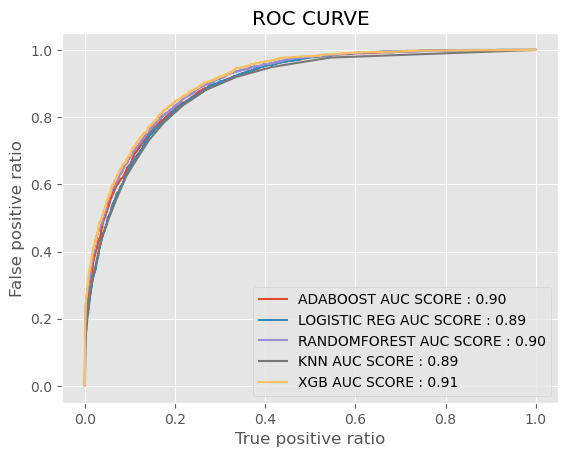

In [55]:
# ROC Curve
y_pred_proba_ada = ada.predict_proba(X_test)
y_pred_proba_log = log_reg.predict_proba(X_test)
y_pred_proba_forest = forest.predict_proba(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)

y_pred_proba_ada = y_pred_proba_ada[:, 1]
y_pred_proba_log = y_pred_proba_log[:, 1]
y_pred_proba_forest = y_pred_proba_forest[:, 1]
y_pred_proba_knn = y_pred_proba_knn[:, 1]
y_pred_proba_xgb = y_pred_proba_xgb[:, 1]

fpr_ada, tpr_ada, thresholds = roc_curve(y_test, y_pred_proba_ada)
auc_score_ada = auc(fpr_ada, tpr_ada)

fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_proba_log)
auc_score_log = auc(fpr_log, tpr_log)

fpr_forest, tpr_forest, thresholds = roc_curve(y_test, y_pred_proba_forest)
auc_score_forest = auc(fpr_forest, tpr_forest)

fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_proba_knn)
auc_score_knn = auc(fpr_knn, tpr_knn)

fpr_xgb, tpr_xgb, thresholds = roc_curve(y_test, y_pred_proba_xgb)
auc_score_xgb = auc(fpr_xgb, tpr_xgb)

# plot the roc_curve
plt.plot(fpr_ada, tpr_ada, label=f"ADABOOST AUC SCORE : {auc_score_ada:.2f}")
plt.plot(fpr_log, tpr_log, label=f"LOGISTIC REG AUC SCORE : {auc_score_log:.2f}")
plt.plot(fpr_forest, tpr_forest, label=f"RANDOMFOREST AUC SCORE : {auc_score_forest:.2f}")
plt.plot(fpr_knn, tpr_knn, label=f"KNN AUC SCORE : {auc_score_knn:.2f}")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGB AUC SCORE : {auc_score_xgb:.2f}")
plt.ylabel("False positive ratio")
plt.xlabel("True positive ratio")
plt.title("ROC CURVE")
plt.legend()
plt.show()

#### Model Comparison
All five models used had an accuracy of 0.84, but the XGBClassifier had the highest AUC score of 0.91 and best performance compared to the others. It also had the fastest processing time.


### Saving the model

In [52]:
# Save the model
joblib.dump(xgb, "XGB_model.pkl")

['XGB_model.pkl']

## 6. Summary and Recommendations <a id="summary"><a/>

### Insights
- Education Matters: Higher education levels significantly increase the likelihood of earning above $50,000.
- Occupation Variance: Certain occupations, such as those in management and technical fields, are strongly correlated with higher income levels.
- Hours Worked: There is a positive correlation between the number of hours worked per week and income level.
- Demographics Impact: Age and capital gains also play a critical role in income prediction.

### Recommendations
- Model Maintenance: Regularly update the model with new data to adapt to changing income trends.
- Targeted Training Programs: Organizations can use insights from the model to design educational programs that enhance skills in high-demand occupations.
- Policy Implications: Policymakers can use this information to address income inequality and tailor interventions to support lower-income groups.

### Conclusion
The project successfully developed a machine learning model to predict income levels based on demographic data. The xgb model showed promising results, achieving an accuracy of 84%, and an AUC score of 91%.
Future work could explore more hyperparameter tuning, feature selection and the use of more advanced models. Pipelines could also be implemented to expedite the data preprocessing stage.

##  References
- UCI Machine Learning Repository - Adult Dataset
- Python Data Science Handbook
- The Python Handbook
